# Project Name: Breast cancer detection


> What are the Data Pre-processing steps?


1-Importing The Libraries

2-Importing The Dataset

3-Missing Data

4-Encoding categorical data

5-Feature Selection

6-Feature Scaling

7-Splitting the dataset into the Training set and Test set


> The Algorithms used in the Project : -
1. Logistic Regression
2. Support Vector Machine [ SVM ]
3. K Nearest Neighbors [ KNN ] 
4. Decision Tree 
5. Random Force
6. Naive Bayes

> Evaluation Classification Methods Performance : - [ Metrics Model ]
1. Confusion Matrix
2. Classification Report
3. ROC Curve && AUC [ Area Under The Curve ]




> Compare all the algorithm of the AUC

> In the end, we will compare all the algorithms to each other and see which one is the best 


> Importing The Libraries




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



> Importing The Dataset



In [2]:
dataset = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
print('Dataset: ',dataset.head(5))
print('*******************************************************')
print('Dataset Shape: ',dataset.shape)
print('*******************************************************')
print(dataset.columns)
print('*******************************************************')


Dataset:           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  

> Drop Unless Columns

In [3]:
dataset.drop(['id','Unnamed: 32'],axis=1,inplace=True)
print(dataset.head(5))

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

> Dataset information

In [4]:
Positive=dataset[dataset['diagnosis'].isin(['M'])]
Negative=dataset[dataset['diagnosis'].isin(['B'])]
print('Positive',Positive)
print('*******************************************************')
print('Negative',Negative)

Positive     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
563         M        20.92         25.09          143.00     1347.0   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010     

Number of Benign 357
Number of Malignant 212


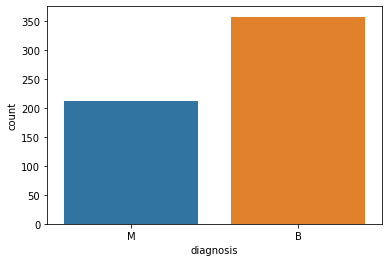

In [5]:
y=dataset.diagnosis
B ,M = y.value_counts()
print('Number of Benign',B)
print('Number of Malignant',M)
ax=sns.countplot(y,data = dataset,label='Count')

> Variance In Data

In [6]:
dataset.std()

radius_mean                  3.524049
texture_mean                 4.301036
perimeter_mean              24.298981
area_mean                  351.914129
smoothness_mean              0.014064
compactness_mean             0.052813
concavity_mean               0.079720
concave points_mean          0.038803
symmetry_mean                0.027414
fractal_dimension_mean       0.007060
radius_se                    0.277313
texture_se                   0.551648
perimeter_se                 2.021855
area_se                     45.491006
smoothness_se                0.003003
compactness_se               0.017908
concavity_se                 0.030186
concave points_se            0.006170
symmetry_se                  0.008266
fractal_dimension_se         0.002646
radius_worst                 4.833242
texture_worst                6.146258
perimeter_worst             33.602542
area_worst                 569.356993
smoothness_worst             0.022832
compactness_worst            0.157336
concavity_wo

> Correlation In Data

In [7]:
dataset.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


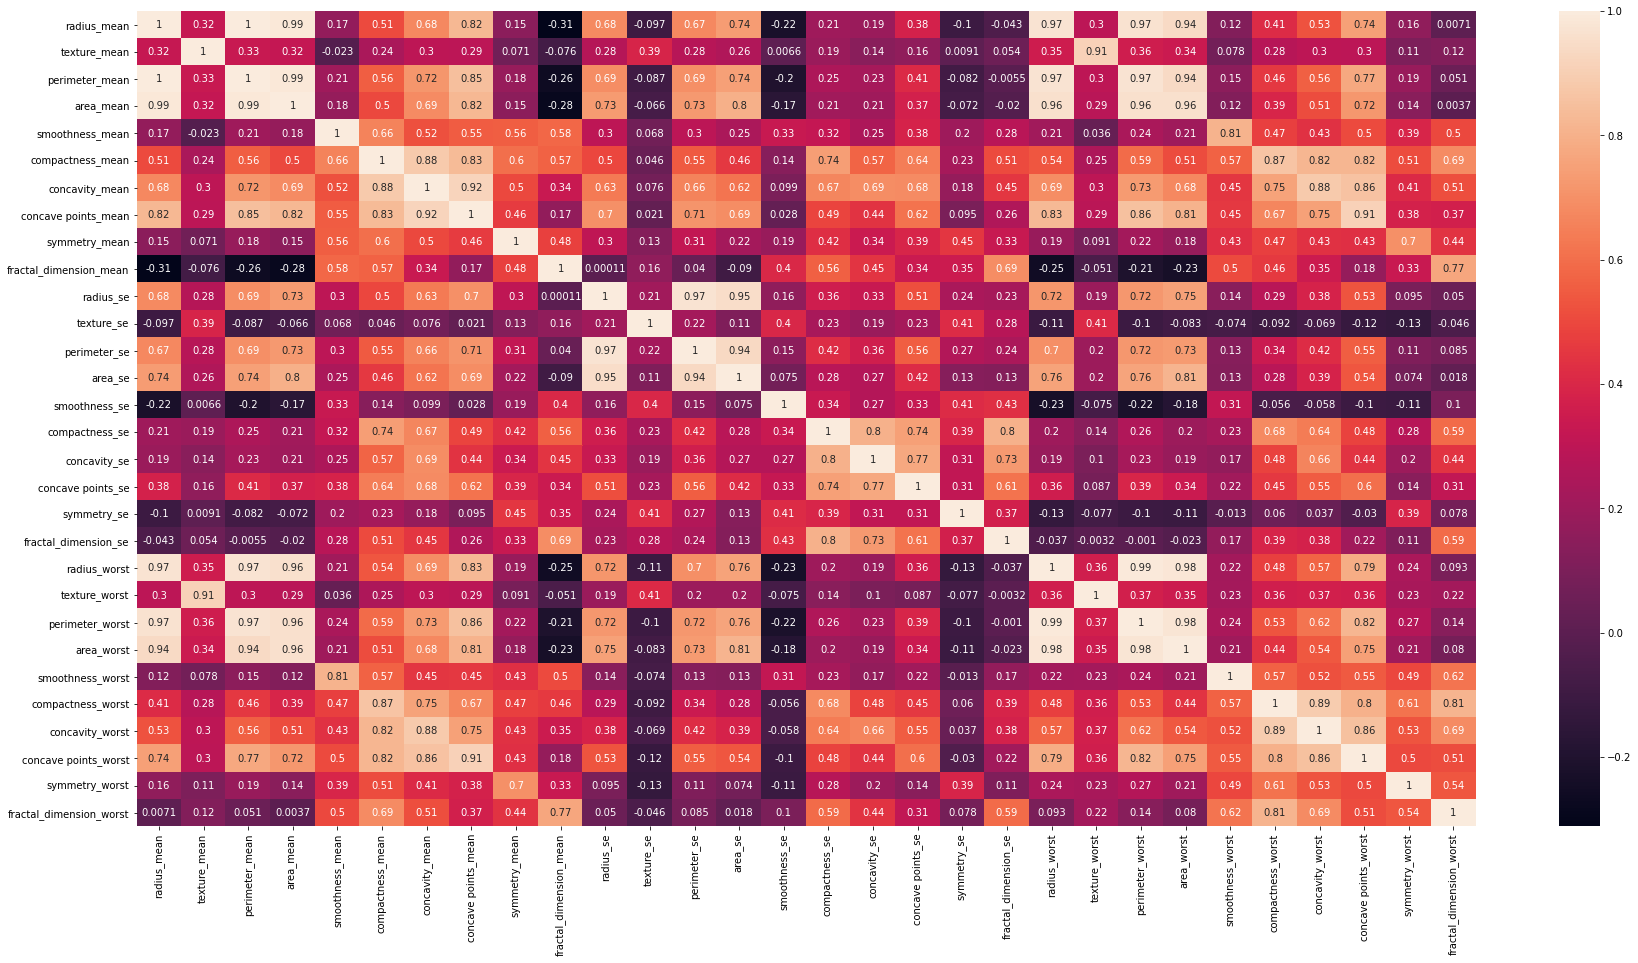

In [8]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

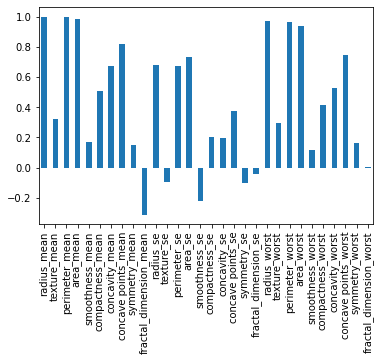

In [9]:
dataset.corr()['radius_mean'].plot(kind='bar')

> Missing Dataset

In [10]:
dataset.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

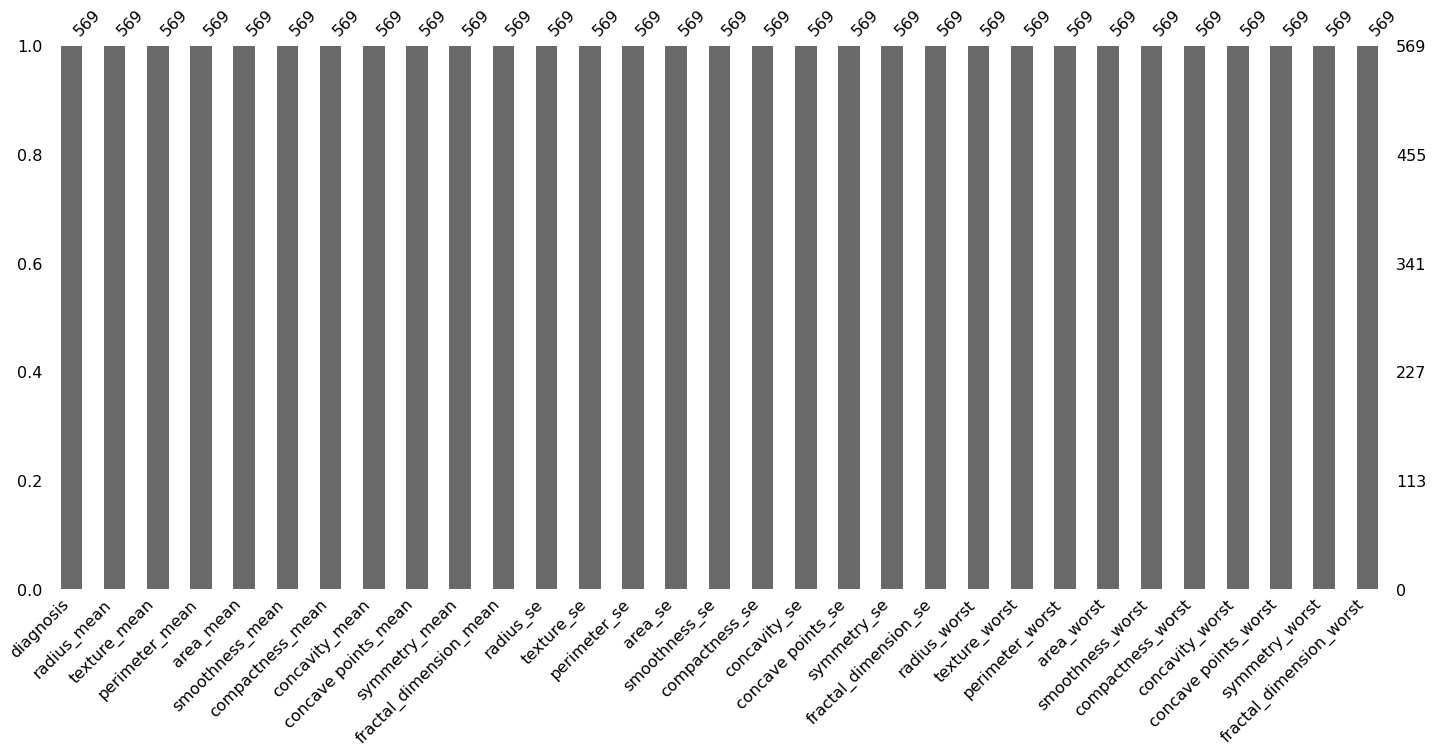

In [11]:
import missingno as msno
msno.bar(dataset)

In [12]:
num = dataset.select_dtypes('number').columns.to_list()
cat = dataset.select_dtypes('object').columns.to_list()
diagnosis_num = dataset[num]
diagnosis_cat = dataset[cat]

print('Number :')
for i in diagnosis_num.columns:
  print(i)
print('----------------------------------')
print('Categorical :')
for v in diagnosis_cat.columns:
  print(v)


Number :
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst
----------------------------------
Categorical :
diagnosis


> Encoding categorical data

In [13]:
dataset['diagnosis'] = dataset['diagnosis'].map({'B':0,'M':1})

> Separated dataset into Independent variables && dependent variables


In [14]:
y = dataset['diagnosis'].values
dataset.drop(['diagnosis'],axis=1,inplace=False)
X = dataset.values

> Feature Selection

In [15]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
Feature_Selection  = SelectPercentile(score_func=chi2,percentile=70)
print('X shape :',X.shape)
X = Feature_Selection.fit_transform(X,y)
print('X New shape :',X.shape)
print('Feature Selected : \n',Feature_Selection.get_support())

X shape : (569, 31)
X New shape : (569, 21)
Feature Selected : 
 [ True  True  True  True  True False  True  True  True False False  True
 False  True  True False  True  True False False False  True  True  True
  True False  True  True  True  True False]


> Feature Scaling

In [16]:
one_column = np.ones((X.shape[0],1))
X = np.concatenate((one_column, X), axis = 1)

In [17]:
y = np.reshape(y,(y.shape[0],1))
theta2 = np.zeros(X.shape[1])

In [18]:
print('X: ',X[:3,:])
print('*******************************************************')
print('X Shape: ',X.shape)
print('*******************************************************')
print('Y: ',y[:3,:])
print('*******************************************************')
print('Y Shape: ',y.shape)
print('*******************************************************')
print('Theta ',theta2)
print('Theta Shape ',theta2.shape)


X:  [[1.000e+00 1.000e+00 1.799e+01 1.038e+01 1.228e+02 1.001e+03 2.776e-01
  3.001e-01 1.471e-01 1.095e+00 8.589e+00 1.534e+02 4.904e-02 5.373e-02
  2.538e+01 1.733e+01 1.846e+02 2.019e+03 6.656e-01 7.119e-01 2.654e-01
  4.601e-01]
 [1.000e+00 1.000e+00 2.057e+01 1.777e+01 1.329e+02 1.326e+03 7.864e-02
  8.690e-02 7.017e-02 5.435e-01 3.398e+00 7.408e+01 1.308e-02 1.860e-02
  2.499e+01 2.341e+01 1.588e+02 1.956e+03 1.866e-01 2.416e-01 1.860e-01
  2.750e-01]
 [1.000e+00 1.000e+00 1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.599e-01
  1.974e-01 1.279e-01 7.456e-01 4.585e+00 9.403e+01 4.006e-02 3.832e-02
  2.357e+01 2.553e+01 1.525e+02 1.709e+03 4.245e-01 4.504e-01 2.430e-01
  3.613e-01]]
*******************************************************
X Shape:  (569, 22)
*******************************************************
Y:  [[1]
 [1]
 [1]]
*******************************************************
Y Shape:  (569, 1)
*******************************************************
Theta  [0. 0. 0. 0. 0. 0.

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:,1:] = sc.fit_transform(X[:,1:])
print(X[:2,:])

[[ 1.          1.29767572  1.09706398 -2.07333501  1.26993369  0.9843749
   3.28351467  2.65287398  2.53247522  2.48973393  2.83303087  2.48757756
   1.31686157  0.72402616  1.88668963 -1.35929347  2.30360062  2.00123749
   2.61666502  2.10952635  2.29607613  2.75062224]
 [ 1.          1.29767572  1.82982061 -0.35363241  1.68595471  1.90870825
  -0.48707167 -0.02384586  0.54814416  0.4992546   0.26332697  0.74240195
  -0.69292627 -0.44078006  1.80592744 -0.36920322  1.53512599  1.89048899
  -0.43044422 -0.14674897  1.0870843  -0.24388967]]


> Logistic Regression without Library 

> Splitting the dataset into the Training set and Test set


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=22)
print('X_Train')
print(X_train[:3,:])
print('****************************')
print('X_test')
print(X_test[:3,:])
print(X_test.shape)
print('****************************')
print('Y_train')
print(y_train[:3,:])
print('****************************')
print('Y_test')
print(y_test[:3,:])

X_Train
[[ 1.         -0.77060855 -0.48205495 -0.53281658 -0.55067316 -0.50508163
  -1.32283191 -0.94638513 -0.82357982 -0.0987915  -0.18764592 -0.20191143
  -0.82091331 -0.72728989 -0.69770035 -0.89030335 -0.759575   -0.64108111
  -1.3177319  -1.19851005 -1.31384558 -1.61738541]
 [ 1.          1.29767572  1.99738898  0.87273197  1.86307257  2.13054826
  -0.04057482  0.26240749  0.96471697  1.03413953  0.71132967  1.18045599
  -0.72031214 -0.48885774  2.67153241  1.61423416  2.40487247  3.04895347
   0.03648233  0.20778802  1.3139606  -0.12740946]
 [ 1.          1.29767572  2.54553638  0.12574342  2.47680656  2.92120878
   0.43889761  0.98934031  1.32531684  3.19713909  3.35083288  3.07722338
   0.4516915   0.26082255  3.00700611 -0.29429508  3.10483968  3.34252489
   0.68852554  0.51434977  1.70223883  0.01171967]]
****************************
X_test
[[ 1.         -0.77060855  0.10585444 -1.95465459  0.09518918 -0.04035527
   0.10535157 -0.0047623   0.22855671 -0.40521343 -0.46436803 

> Logistic Regression

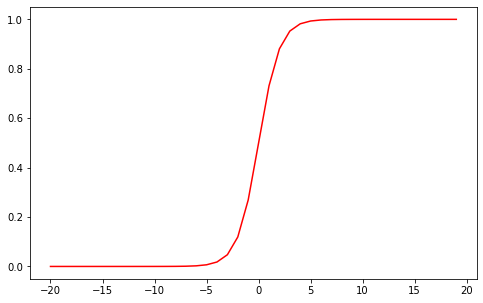

In [21]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
n = np.arange(-20,20,step=1)
plt.figure(figsize=(8,5))
plt.plot(n,sigmoid(n),'r')

In [22]:
def cost_function_reg(theta2,X2,y2,lr):
    theta2 = np.matrix(theta2)
    X2 = np.matrix(X2)
    y2 = np.matrix(y2)
    first = np.multiply(-y2, np.log(sigmoid(X2 * theta2.T)))
    second = np.multiply((1 - y2), np.log(1 - sigmoid(X2 * theta2.T)))
    total_equation=np.sum(first - second) / (len(X2))
    reg = (lr / 2 * len(X2)) * np.sum(np.power(theta2[:,1:theta2.shape[1]], 2))
    final = total_equation + reg
    return final 

In [23]:
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)

        else:
            grad[i] =(np.sum(term)/len(X))+((learningRate/len(X))*theta[:,i])

    return grad

learningRate = 0.0001


rcost = cost_function_reg(theta2, X_train, y_train, learningRate)
print()
print('regularized cost = ' , rcost)
print()




regularized cost =  0.6931471805599452



In [24]:
import scipy.optimize  as opt
result = opt.fmin_tnc(func=cost_function_reg, x0=theta2, fprime=gradientReg,args=(X_train, y_train, learningRate))
print( 'result = ' , result )
print()
Cost_After_Optimize = cost_function_reg(result[0], X_train, y_train,learningRate)
print()
print('Cost_Function After Optimize = ' , Cost_After_Optimize)
print()

result =  (array([-1.07525552,  1.43973193,  0.24845297,  0.32675048,  0.23158381,
        0.13791488,  0.02247252,  0.09360398,  0.26997908, -0.05309557,
       -0.14059313, -0.18873641, -0.32205889, -0.3982369 ,  0.35046599,
        0.48838869,  0.3134705 ,  0.20481047,  0.27776618,  0.27212211,
        0.44593315,  0.50854343]), 57, 4)


Cost_Function After Optimize =  0.128962551251086



In [25]:
print('coefficient :',result[0])
print('No. Iteration :',result[1])

coefficient : [-1.07525552  1.43973193  0.24845297  0.32675048  0.23158381  0.13791488
  0.02247252  0.09360398  0.26997908 -0.05309557 -0.14059313 -0.18873641
 -0.32205889 -0.3982369   0.35046599  0.48838869  0.3134705   0.20481047
  0.27776618  0.27212211  0.44593315  0.50854343]
No. Iteration : 57


In [26]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X_test)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y_test)]
accuracy_LR = np.sum(correct)/ len(correct) *100
print('Accuracy',accuracy_LR)

Accuracy 98.83040935672514


> Comfusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix
cm_LR  = confusion_matrix(y_test,predictions)
print(cm_LR)

[[100   0]
 [  2  69]]


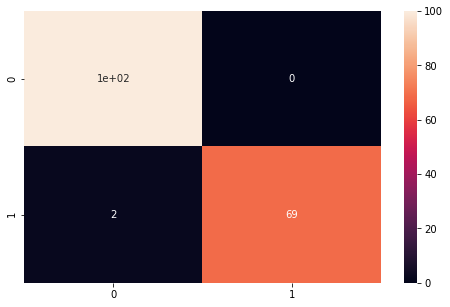

In [28]:
plt.figure(figsize=(8,5))
sns.heatmap(cm_LR,annot=True)
plt.show()

> Classification Report : -

In [29]:
from sklearn.metrics import classification_report
cr_LR = classification_report(y_test,predictions)
print(cr_LR)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       1.00      0.97      0.99        71

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



> Roc Curve And AUC [ Area Under The Curve ]

tpr_LR:  [0. 0. 1.]
fpr_LR:  [0.         0.97183099 1.        ]
threshold_LR: [2 1 0]
Area Under The Curve : 0.9859154929577465


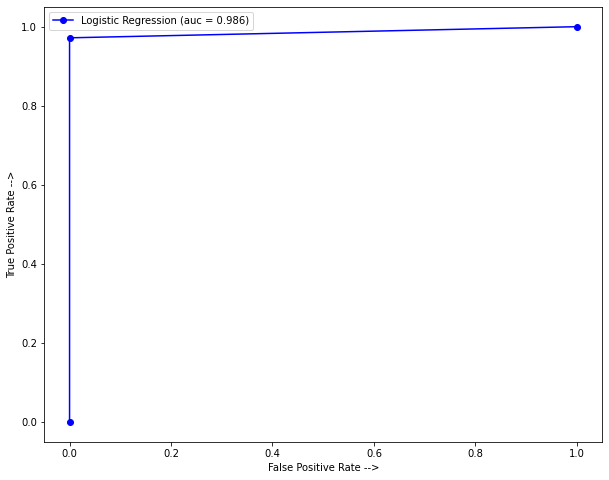

In [30]:
from sklearn.metrics import roc_curve,auc
tpr_LR,fpr_LR,threshold_LR = roc_curve(y_test,predictions)
print('tpr_LR: ',tpr_LR)
print('fpr_LR: ',fpr_LR)
print('threshold_LR:',threshold_LR)

auc_LR = auc(tpr_LR,fpr_LR)
print('Area Under The Curve :',auc_LR)

#Draw ROC Curve && AUC [Area Under The Curve]
plt.figure(figsize=(10,8))
plt.plot(tpr_LR,fpr_LR,marker='o',color='blue',label='Logistic Regression (auc = %0.3f)'% auc_LR)
plt.ylabel('True Positive Rate -->')
plt.xlabel('False Positive Rate -->')

plt.legend()

plt.show()


> Support Vector Machine [ SVM ]

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

S_V_C = SVC(C =1,kernel='rbf', random_state=22)
Cross_Validation_S_V_C = cross_validate(S_V_C, X_train, y_train, cv=6, return_train_score=True)

print('Train score value :',Cross_Validation_S_V_C['train_score'])
print('Test score value :',Cross_Validation_S_V_C['test_score'])

score_value_S_V_C = cross_val_score(estimator=S_V_C, X = X_train, y = y_train, cv=6)
print('Cross_Validation Score is :',np.mean(score_value_S_V_C)*100)

Train score value : [1. 1. 1. 1. 1. 1.]
Test score value : [0.98507463 1.         1.         1.         1.         1.        ]
Cross_Validation Score is : 99.75124378109453


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

In [32]:
S_V_C.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=1, random_state=22)

In [33]:
y_pred_S_V_C = S_V_C.predict(X_test)
print('Y Test: \n',y_test[:3,:])
print('Y Predict: ',y_pred_S_V_C[:3,])

Y Test: 
 [[0]
 [1]
 [1]]
Y Predict:  [0 1 1]


> Accurance Score : -

In [34]:
from sklearn.metrics import accuracy_score
accuracy_S_V_C=accuracy_score(y_test,y_pred_S_V_C)
print(accuracy_S_V_C)

1.0


> Confusion Matrix :-


[[100   0]
 [  0  71]]


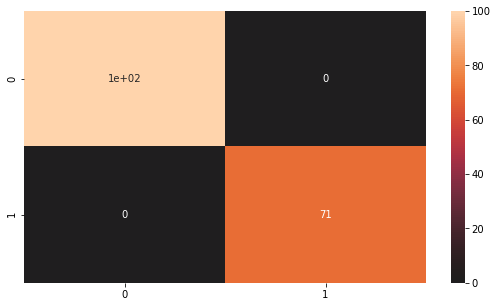

In [35]:
from sklearn.metrics import confusion_matrix
cm_S_V_C=confusion_matrix(y_test,y_pred_S_V_C)
print(cm_S_V_C)
plt.figure(figsize=(9,5))
sns.heatmap(cm_S_V_C,center=True,annot=True)
plt.show()

> Classification Report : -

In [36]:
from sklearn.metrics import classification_report
cr_S_V_C=classification_report(y_test,y_pred_S_V_C)
print(cr_S_V_C)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        71

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



> Roc Curve And AUC [ Area Under the Graph]

tpr_S_V_C [0. 0. 1.]
fpr_S_V_C [0. 1. 1.]
threshold_S_V_C [2 1 0]


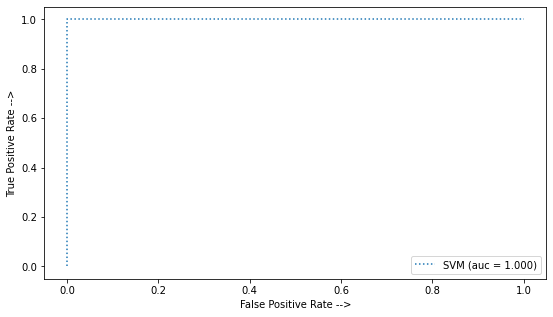

In [37]:
from sklearn.metrics import roc_curve,auc
tpr_S_V_C,fpr_S_V_C,threshold_S_V_C=roc_curve(y_test,y_pred_S_V_C)
auc_S_V_C=auc(tpr_S_V_C, fpr_S_V_C)
print('tpr_S_V_C',tpr_S_V_C)
print('fpr_S_V_C',fpr_S_V_C)
print('threshold_S_V_C',threshold_S_V_C)


#Draw ROC Curve && AUC [Area Under The Curve]
plt.figure(figsize=(9, 5))
plt.plot(tpr_S_V_C, fpr_S_V_C, linestyle=':', label='SVM (auc = %0.3f)' % auc_S_V_C)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

> K Nearest Neighbors [ KNN ]

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=25, metric = 'minkowski', p = 2)
Cross_Validation_knn = cross_validate(knn, X_train,y_train,cv=6,return_train_score=True)

print('Train score value',Cross_Validation_knn['train_score'])
print('Test score value',Cross_Validation_knn['test_score'])

score_value_knn = cross_val_score(estimator=knn, X=X_train,y= y_train,cv=6)
print('Cross_Validation Score is :',np.mean(score_value_knn)*100)

Train score value [0.9939577  0.9939577  0.9939759  0.9939759  0.99096386 0.99096386]
Test score value [1.         0.98507463 0.98484848 0.98484848 1.         1.        ]
Cross_Validation Score is : 99.24619327604404


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when

In [39]:
knn.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(n_neighbors=25)

In [40]:
y_pred_knn=knn.predict(X_test)
print('Y Test:',y_test[:3,:])
print('Y Predict:',y_pred_knn[:3,])

Y Test: [[0]
 [1]
 [1]]
Y Predict: [0 1 1]


> Accuracy Score : -

In [41]:
from sklearn.metrics import accuracy_score
accuracy_knn=accuracy_score(y_test,y_pred_knn)
print('Accuracy Score:',accuracy_knn)

Accuracy Score: 0.9824561403508771


> Confusion Matrix

[[100   0]
 [  3  68]]


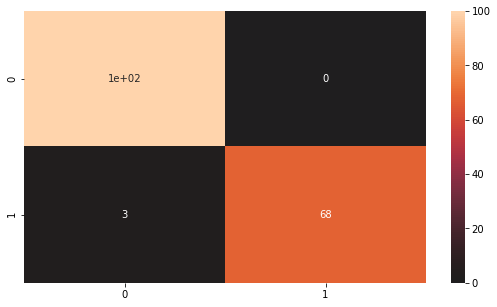

In [42]:
from sklearn.metrics import confusion_matrix
cm_knn=confusion_matrix(y_test,y_pred_knn)
print(cm_knn)
plt.figure(figsize=(9,5))
sns.heatmap(cm_knn,center=True,annot=True)
plt.show()

> Classification Report 

In [43]:
from sklearn.metrics import classification_report
cr_knn=classification_report(y_test,y_pred_knn)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.96      0.98        71

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



> Roc Curve And AUC [ Area Under Tge Curve ]

knn_tpr [0. 0. 1.]
knn_fpr [0.         0.95774648 1.        ]
threhold [2 1 0]


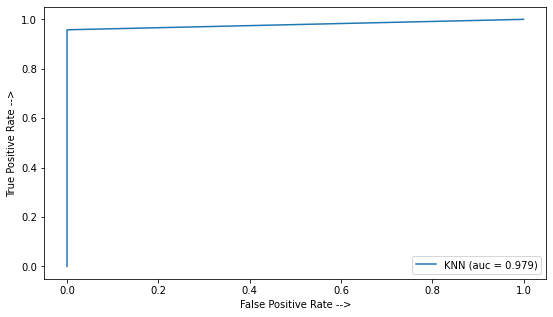

In [44]:
from sklearn.metrics import roc_curve,auc
knn_tpr,knn_fpr,threshold=roc_curve(y_test,y_pred_knn)
knn_auc=auc(knn_tpr,knn_fpr)
print('knn_tpr',knn_tpr)
print('knn_fpr',knn_fpr)
print('threhold',threshold)

plt.figure(figsize=(9,5))
plt.plot(knn_tpr,knn_fpr,linestyle='-', label='KNN (auc = %0.3f)' % knn_auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

> Decision Tree : -

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

dt=DecisionTreeClassifier(criterion = 'entropy',random_state=22,max_depth=10)
Cross_Validation_dt = cross_validate(dt, X_train,y_train,cv=6,return_train_score=True)

print('Train score value',Cross_Validation_dt['train_score'])
print('Test score value',Cross_Validation_dt['test_score'])

score_value_dt = cross_val_score(estimator=dt, X=X_train,y= y_train,cv=6)
print('Cross_Validation Score is :',np.mean(score_value_dt)*100)

Train score value [1. 1. 1. 1. 1. 1.]
Test score value [1. 1. 1. 1. 1. 1.]
Cross_Validation Score is : 100.0


In [46]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=22)

In [47]:
y_pred_dt=dt.predict(X_test)
print('Y Test: ',y_test[:3,:])
print('Y Pred',y_pred_dt[:3,])


Y Test:  [[0]
 [1]
 [1]]
Y Pred [0 1 1]


> Accuracy Score : -

In [48]:
from sklearn.metrics import accuracy_score
accuracy_dt=accuracy_score(y_test,y_pred_dt)
print('Accuracy Score',accuracy_dt)

Accuracy Score 1.0


> Confusion Matrix : -

[[100   0]
 [  0  71]]


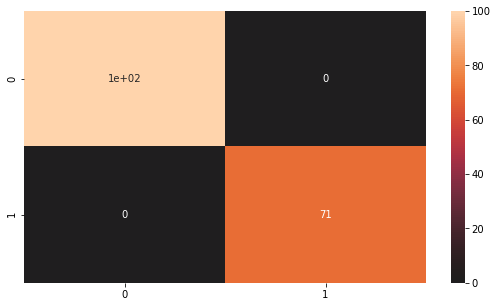

In [49]:
from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(y_test,y_pred_dt)
print(cm_dt)
plt.figure(figsize=(9,5))
sns.heatmap(cm_dt,center=True,annot=True)
plt.show()

> Classification Report : -

In [50]:
from sklearn.metrics import classification_report
cr_dt=classification_report(y_test,y_pred_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        71

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



> Roc Curve And AUC [ Area Under The Roc ]


dt_tpr Value  :  [0. 0. 1.]
dt_fpr Value  :  [0. 1. 1.]
thresholds Value  :  [2 1 0]


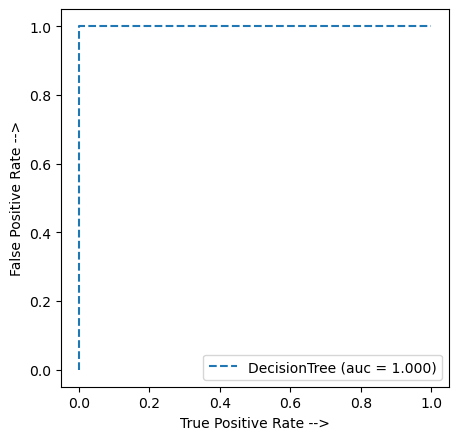

In [51]:
from sklearn.metrics import roc_curve,auc
dt_tpr,dt_fpr,threshold=roc_curve(y_test,y_pred_dt)
dt_auc=auc(dt_tpr,dt_fpr)
print('dt_tpr Value  : ', dt_tpr)
print('dt_fpr Value  : ', dt_fpr)
print('thresholds Value  : ', threshold)

#Draw ROC Curve && AUC [Area Under The Curve]

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(dt_tpr, dt_fpr, linestyle='--', label='DecisionTree (auc = %0.3f)' % dt_auc)

plt.xlabel('True Positive Rate -->')
plt.ylabel('False Positive Rate -->')

plt.legend()
plt.show()

> Random Force : -

In [52]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

rf=RandomForestClassifier(criterion = 'entropy',random_state=22,max_depth=10,n_estimators=50)
Cross_Validation_rf = cross_validate(rf, X_train,y_train,cv=6,return_train_score=True)

print('Train score value',Cross_Validation_rf['train_score'])
print('Test score value',Cross_Validation_rf['test_score'])

score_value_rf = cross_val_score(estimator=rf, X=X_train,y= y_train,cv=6)
print('Cross_Validation Score is :',np.mean(score_value_rf)*100)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 

Train score value [1. 1. 1. 1. 1. 1.]
Test score value [0.98507463 0.97014925 1.         0.98484848 1.         0.98484848]


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 

Cross_Validation Score is : 98.74868083823308


In [53]:
rf.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50,
                       random_state=22)

In [54]:
y_pred_rf=rf.predict(X_test)
print('Y Test: ',y_test[:3,:])
print('Y Pred',y_pred_rf[:3,])


Y Test:  [[0]
 [1]
 [1]]
Y Pred [0 1 1]


> Accurac Score

In [55]:
from sklearn.metrics import accuracy_score
accuracy_rf=accuracy_score(y_test,y_pred_rf)
print('Accuracy Score',accuracy_rf)

Accuracy Score 0.9883040935672515


> Confusion Matrix

[[100   0]
 [  2  69]]


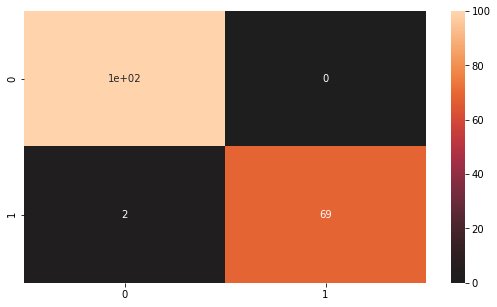

In [56]:
from sklearn.metrics import confusion_matrix
cm_rf=confusion_matrix(y_test,y_pred_rf)
print(cm_rf)
plt.figure(figsize=(9,5))
sns.heatmap(cm_rf,center=True,annot=True)
plt.show()

> Classification Report

In [57]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       1.00      0.97      0.99        71

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



> Roc Curve And AUC

rf_tpr Value  :  [0. 0. 1.]
rf_fpr Value  :  [0.         0.97183099 1.        ]
thresholds Value  :  [2 1 0]


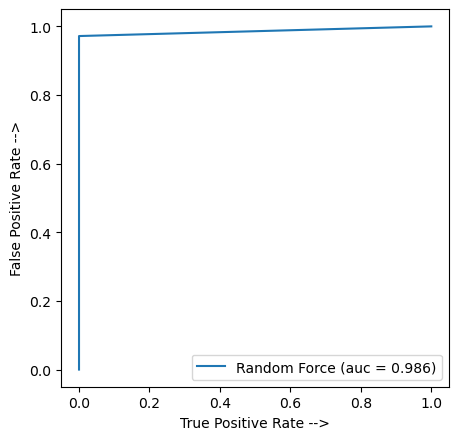

In [58]:
from sklearn.metrics import roc_curve,auc
rf_tpr,rf_fpr,threshold=roc_curve(y_test,y_pred_rf)
rf_auc=auc(rf_tpr,rf_fpr)
print('rf_tpr Value  : ', rf_tpr)
print('rf_fpr Value  : ', rf_fpr)
print('thresholds Value  : ', threshold)

#Draw ROC Curve && AUC [Area Under The Curve]

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rf_tpr, rf_fpr, linestyle='-', label='Random Force (auc = %0.3f)' % rf_auc)

plt.xlabel('True Positive Rate -->')
plt.ylabel('False Positive Rate -->')

plt.legend()
plt.show()

> Naive Bayes : -

In [59]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

NB=BernoulliNB()
Cross_Validation_NB = cross_validate(NB, X_train,y_train,cv=6,return_train_score=True)

print('Train score value',Cross_Validation_NB['train_score'])
print('Test score value',Cross_Validation_NB['test_score'])

score_value_NB = cross_val_score(estimator=NB, X=X_train,y= y_train,cv=6)
print('Cross_Validation Score is :',np.mean(score_value_NB)*100)

Train score value [0.96374622 0.96374622 0.97289157 0.96987952 0.96385542 0.96987952]
Test score value [0.97014925 0.98507463 0.96969697 0.96969697 0.98484848 0.89393939]
Cross_Validation Score is : 96.22342831298056


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

In [60]:
NB.fit(X_test,y_test)
print('Naive Bayse Test Score',NB.score(X_test,y_test))

Naive Bayse Test Score 0.9766081871345029


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [61]:
#Calculating Prediction
y_pred_NB = NB.predict(X_test)
y_pred_prob = NB.predict_proba(X_test)
y_pred_prob=y_pred_prob.astype(int)
print('Y Test \n' ,y_test[:10,:])
print('Predicted Value for BernoulliNBModel is :\n ' , y_pred_NB[:10,])
print('Prediction Probabilities Value for BernoulliNBModel is : \n' , y_pred_prob[:10,:])

Y Test 
 [[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
Predicted Value for BernoulliNBModel is :
  [0 1 1 1 1 0 0 0 0 0]
Prediction Probabilities Value for BernoulliNBModel is : 
 [[0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


> Accuracy Score 

In [62]:
from sklearn.metrics import accuracy_score
accuracy_NB=accuracy_score(y_test,y_pred_NB)
print(accuracy_NB)

0.9766081871345029


> Confusion Matrix

[[98  2]
 [ 2 69]]


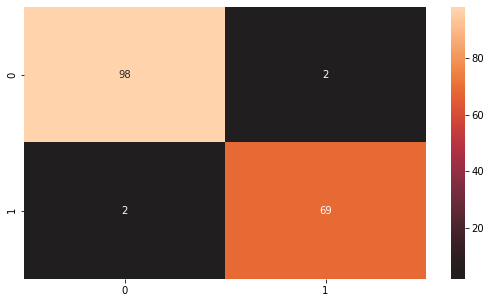

In [63]:
from sklearn.metrics import confusion_matrix
cm_NB=confusion_matrix(y_test,y_pred_NB)
print(cm_NB)
plt.figure(figsize=(9,5))
sns.heatmap(cm_NB,center=True,annot=True)
plt.show()

Classification Report

In [64]:
from sklearn.metrics import classification_report
cr_NB=classification_report(y_test,y_pred_NB)
print(cr_NB)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       100
           1       0.97      0.97      0.97        71

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



> Roc Curve And AUC

nb_tpr Value  :  [0.   0.02 1.  ]
nb_fpr Value  :  [0.         0.97183099 1.        ]
thresholds Value  :  [2 1 0]


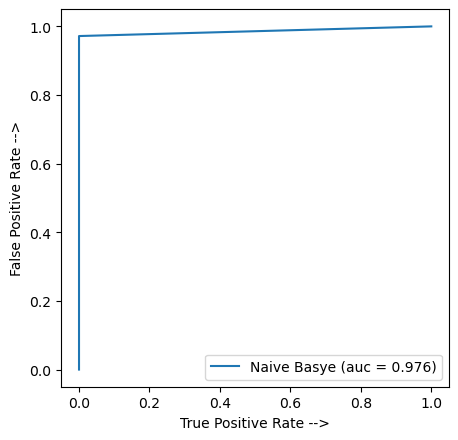

In [65]:
from sklearn.metrics import roc_curve,auc
nb_tpr,nb_fpr,threshold=roc_curve(y_test,y_pred_NB)
nb_auc=auc(nb_tpr,nb_fpr)
print('nb_tpr Value  : ', nb_tpr)
print('nb_fpr Value  : ', nb_fpr)
print('thresholds Value  : ', threshold)

#Draw ROC Curve && AUC [Area Under The Curve]

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rf_tpr, rf_fpr, linestyle='-', label='Naive Basye (auc = %0.3f)' % nb_auc)

plt.xlabel('True Positive Rate -->')
plt.ylabel('False Positive Rate -->')

plt.legend()
plt.show()

> Compare all the algorithm of the AUC

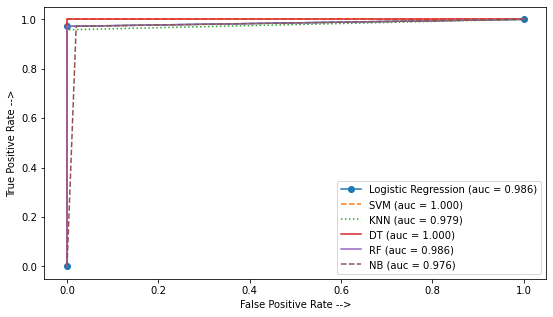

In [66]:
from sklearn.metrics import roc_curve, auc

tpr_LR,fpr_LR,threshold_LR=roc_curve(y_test,predictions)
auc_LR = auc(tpr_LR, fpr_LR)

tpr_S_V_C,fpr_S_V_C , threshold_S_V_C = roc_curve(y_test, y_pred_S_V_C)
svm_auc = auc(tpr_S_V_C, fpr_S_V_C)

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
knn_auc = auc(knn_fpr, knn_tpr)

dt_fpr, dt_tpr, threshold = roc_curve(y_test, y_pred_dt)
dt_auc = auc(dt_fpr, dt_tpr)

rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_pred_rf)
rf_auc = auc(rf_fpr, rf_tpr)


nb_fpr, nb_tpr, threshold = roc_curve(y_test, y_pred_NB)
nb_auc = auc(nb_fpr, nb_tpr)

plt.figure(figsize=(9, 5))
plt.plot(tpr_LR, fpr_LR, marker='o', label='Logistic Regression (auc = %0.3f)' % auc_LR)
plt.plot(tpr_S_V_C, fpr_S_V_C, linestyle='--', label='SVM (auc = %0.3f)' % auc_S_V_C)
plt.plot(knn_fpr, knn_tpr, linestyle=':', label='KNN (auc = %0.3f)' % knn_auc)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='DT (auc = %0.3f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='RF (auc = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, linestyle='--', label='NB (auc = %0.3f)' % nb_auc)



plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

In [67]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'KNN','Decision Tree', 
              'Random Forest', 'Naive Bayes'],
    'Score': [accuracy_LR, accuracy_S_V_C, accuracy_knn, 
              accuracy_dt, accuracy_rf, accuracy_NB]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,98.830409
1,Support Vector Machines,1.000000
3,Decision Tree,1.000000
4,Random Forest,0.988304
2,KNN,0.982456
5,Naive Bayes,0.976608
